In [1]:
import numpy as np

In [2]:
# Degree of freedoms adn their limits
@staticmethod
def DoF():
    return [
        {'label': 'alpha_1', 'min': 120.0, 'max': 180.0},
        {'label': 'alpha_2', 'min': 120.0, 'max': 180.0},
        {'label': 't_mid', 'min': 0.005, 'max': 0.06},
        {'label': 't_le', 'min': 0.005, 'max': 0.06},
        {'label': 't_te', 'min': 0.005, 'max': 0.06},
        {'label': 'ratio', 'min': 0.4, 'max': 0.6},
        {'label': 'deltaM', 'min': 1.0, 'max': 1.5},
        {'label': 'offM', 'min': 1.0, 'max': 1.5},
        {'label': 'bladeLength', 'min': 0.4, 'max': 0.80},
    ]

In [8]:
from readData import *

In [9]:
data = read_all_data('./runData')

In [10]:
data

{'F': [-11203.846429000001,
  1411.1828000000003,
  -4601.557344999999,
  -2627.3524800000005,
  277.17896219,
  -3029.7499949999997,
  -2687.550883,
  -8.11034831,
  -5373.691672000001,
  -3053.4585,
  -722.55892,
  -2208.464292,
  4662.343399999999,
  -1321.164372,
  -4023.27438,
  -3342.79517,
  2011.1863,
  -26547.064882999995,
  2502.549535,
  -14235.668112000003,
  -21989.764223399998,
  -7060.907348000001,
  -296.0935149999999,
  -11444.848844,
  2238.803254,
  3151.3785,
  -17128.881773,
  -11294.095683999998,
  -8161.427960999999,
  -26883.352074000006,
  1073.063131,
  2314.8898249999997,
  -3890.9692030000006,
  -9717.576603999998,
  -9896.486047,
  -2067.02874,
  -1766.98851,
  1.7976931348623157e+308,
  417.85147900000004,
  995.4062899999997,
  -1388.9367429999998,
  2318.592,
  -7533.698168,
  -13145.274453999999,
  -6803.50242,
  3368.64838,
  1979.679333,
  -11696.343641,
  3511.574213,
  -6901.4858,
  -3428.761090000001,
  -6596.542228,
  -12152.629872,
  -8968.479629

# Find out Turbine blades
*  Now the check the indices where it is turbine and not pump
* That means efficiency is less than 1 and greater than 0.
* Also the Forces are > 0.

In [12]:
# Find indices where F > 0 and 0 < eta < 1
indices = [i for i, (f, e) in enumerate(zip(data['F'], data['eta']))
           if f > 0 and 0 < e < 1]

print(len(indices)) 

2289


In [14]:
point_cloud = np.loadtxt('./points.txt')

In [16]:
len(point_cloud)

10672

In [17]:
turbine_blade_point_clouds = point_cloud[indices]

In [18]:
turbine_blade_point_clouds

array([[-0.30730677,  1.20121217, -0.28759542, ...,  1.20363903,
        -0.30730677,  1.20121217],
       [-0.23718132,  1.48598361, -0.23661238, ...,  1.48977113,
        -0.23718132,  1.48598361],
       [-0.29151502,  1.05573535, -0.26483279, ...,  1.0554527 ,
        -0.29151502,  1.05573535],
       ...,
       [-0.21468651,  1.26567924, -0.20610392, ...,  1.2640208 ,
        -0.21468651,  1.26567924],
       [-0.21513341,  1.37403095, -0.21140426, ...,  1.37791383,
        -0.21513341,  1.37403095],
       [-0.15550409,  1.35256481, -0.14845671, ...,  1.3433975 ,
        -0.15550409,  1.35256481]], shape=(2289, 400))

In [ ]:
#np.save("blade_cloud_clean_1.npy", turbine_blade_point_clouds)

# HydroFoil Plots
* Data was stored with x1 y1 x2 y2 ... x200 y200.
* Now lets plot some random blades

In [38]:
import matplotlib.pyplot as plt

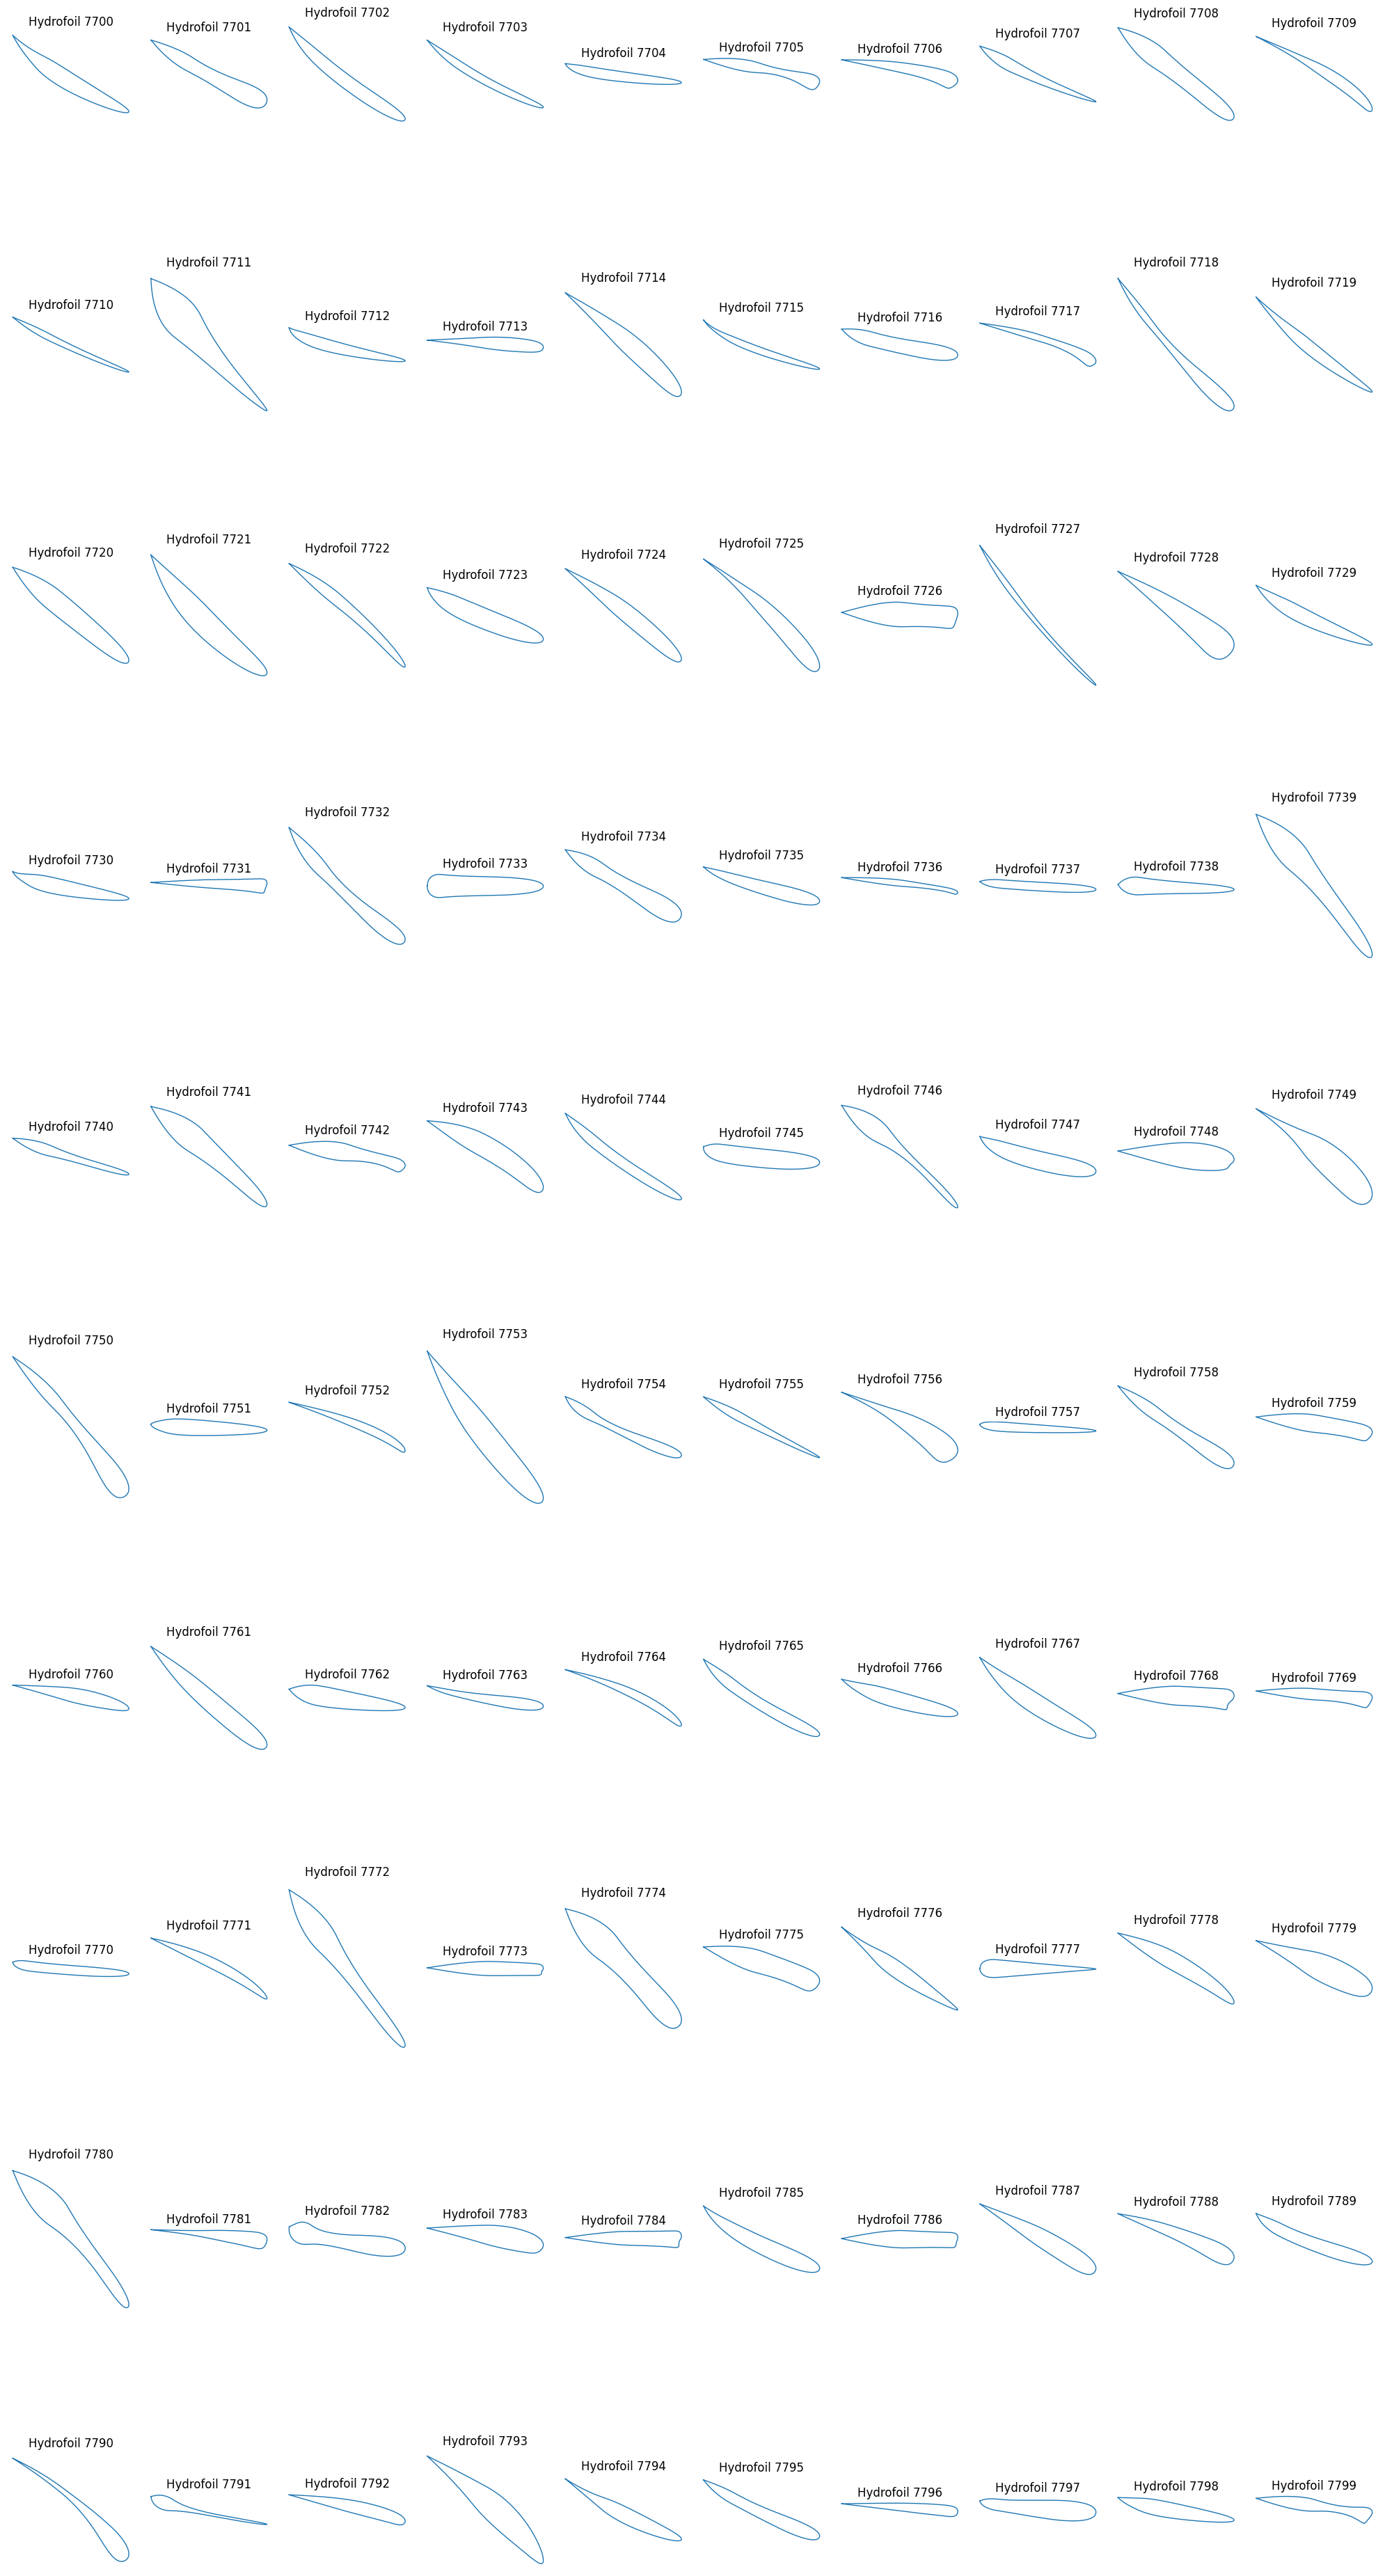

In [145]:
num_plots = 100  # Total number of hydrofoils to plot
rows, cols = 10, 10  # Grid layout

indices = np.arange(7700, 7800)  # Or your custom selection
#indices = np.arange(1050, 1100)  # Or your custom selection

fig, axes = plt.subplots(rows, cols, figsize=(20, 40))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, idx in enumerate(indices):
    x = point_cloud[idx, ::2]
    y = point_cloud[idx, 1::2]
    axes[i].plot(x, y, lw=1)
    axes[i].set_title(f'Hydrofoil {idx}')
    axes[i].set_aspect('equal')
    axes[i].axis('off')  # Optional: Hide axes for clarity

plt.tight_layout()
plt.show()

# Store the indices of the good performing hydrofoils

In [157]:
all_indices = np.loadtxt('./indices.txt')
print(len(all_indices))

1787


In [159]:
# now save the well performing hydrofoils
good_candidates = point_cloud[all_indices.astype(int)]
len(good_candidates)

1787

In [160]:
reshaped_good_candidates = good_candidates.reshape(len(good_candidates), 200, 2)

In [162]:
reshaped_good_candidates.shape[0]

1787

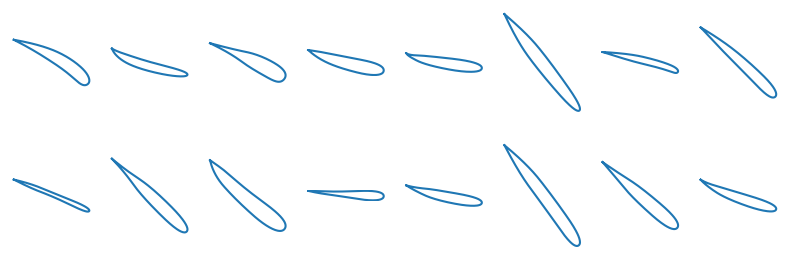

In [205]:
# Select 16 random indices
random_indices = np.random.choice(reshaped_good_candidates.shape[0], 16, replace=False)

# Create 4x4 subplot grid
fig, axes = plt.subplots(2, 8, figsize=(8, 3))

for i, ax in enumerate(axes.flat):
    hydfoil = reshaped_good_candidates[random_indices[i]]
    ax.plot(hydfoil[:, 0], hydfoil[:, 1])#, marker='o', markersize=2)
    #ax.set_title(f'Candidate {random_indices[i]}')
    ax.set_aspect('equal')
    ax.axis('off')  # turn off axes for clean look

plt.tight_layout()
#plt.show()
plt.savefig('without_transform.svg', dpi=300)


In [167]:
# Save the good_candidates
np.save("good_candidates_200_2.npy", reshaped_good_candidates)

In [173]:
# Lets Pre-process to get x-axis symmetric data

import numpy as np

def preprocess_hydrofoils_batch(filename, savefile=None):
    # Load the 3D array: (N, 200, 2)
    data = np.load(filename)  # shape: (N, 200, 2)
    N = data.shape[0]
    processed = np.empty_like(data)
    
    for i in range(N):
        point_cloud = data[i]  # shape: (200, 2)
        # Identify leading and trailing edge points (min/max x)
        leading_idx = np.argmin(point_cloud[:, 0])
        trailing_idx = np.argmax(point_cloud[:, 0])
        leading_edge = point_cloud[leading_idx]
        trailing_edge = point_cloud[trailing_idx]

        # Translate so leading edge is at origin
        translated = point_cloud - leading_edge

        # Compute angle to align chord with X-axis
        chord_vec = trailing_edge - leading_edge
        angle = -np.arctan2(chord_vec[1], chord_vec[0])

        # Rotation matrix
        rot_matrix = np.array([
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle),  np.cos(angle)]
        ])
        rotated = translated @ rot_matrix.T

        # Normalize chord length
        chord_length = np.linalg.norm(chord_vec)
        normalized = rotated / chord_length

        processed[i] = normalized

    if savefile:
        np.save(savefile, processed)
    return processed

# Example usage:
# processed = preprocess_hydrofoils_batch('good_candidates_200_2.npy', 'processed_candidates_200_2.npy')


In [180]:
processed = preprocess_hydrofoils_batch('good_candidates_200_2.npy', savefile='preprocessed.npy')


In [175]:
processed

array([[[ 0.        ,  0.        ],
        [ 0.04728614, -0.0024608 ],
        [ 0.08171327, -0.0042214 ],
        ...,
        [ 0.07797925,  0.02545718],
        [ 0.04505517,  0.01487007],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.04462918, -0.00724852],
        [ 0.07710722, -0.01252847],
        ...,
        [ 0.06896756,  0.03776596],
        [ 0.03976407,  0.02201052],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.02785427, -0.00391562],
        [ 0.04845499, -0.00677621],
        ...,
        [ 0.04889308,  0.00092204],
        [ 0.0281121 ,  0.00051346],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ],
        [ 0.03041498, -0.00853892],
        [ 0.05285599, -0.01470132],
        ...,
        [ 0.05433739,  0.00699946],
        [ 0.0312932 ,  0.00406045],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.02304955, -0.01

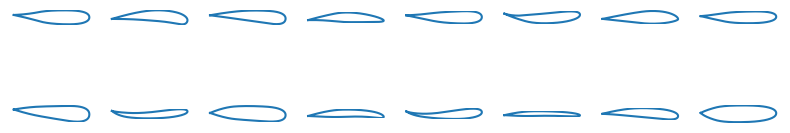

In [215]:
N = processed.shape[0]

# Randomly select 16 unique indices
random_indices = np.random.choice(N, 16, replace=False)

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(2, 8, figsize=(8, 3))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    hydrofoil = processed[idx]  # shape: (200, 2)
    axes[i].plot(hydrofoil[:, 0], hydrofoil[:, 1])#, color='black')#, '-k')
    axes[i].set_aspect('equal')
    #axes[i].set_title(f'Candidate #{idx}')
    #axes[i].axis('equal')
    axes[i].axis('off')

plt.tight_layout()
#plt.show()
plt.savefig('with_transform.svg', dpi=300)